In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

In [2]:
# hyper parameters
EPOCH = 10
BATCH_SIZE = 64
LR = 0.01
DOWNLOAD_MNIST = False

In [3]:
# training data
train_data = torchvision.datasets.MNIST(
    root="./mnist",
    train=True, 
    transform=torchvision.transforms.ToTensor(), # [0, 1]
    download=DOWNLOAD_MNIST
)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [4]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 12),
            nn.Tanh(),
            nn.Linear(12, 3)
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.Tanh(),
            nn.Linear(12, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [5]:
autoencoder = AutoEncoder()

In [6]:
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
loss_func = nn.MSELoss()

In [7]:
for epoch in range(EPOCH):
    for step, (batch_x, batch_y) in enumerate(train_loader):
        b_x = batch_x.view(-1, 28*28)
        b_y = batch_x.view(-1, 28*28)
        encoded, decoded = autoencoder(b_x)
        loss = loss_func(decoded, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step % 100 == 0:
            print("epoch:", epoch, "| step:", step, "| loss:", loss.data.numpy())

epoch: 0 | step: 0 | loss: 0.23242466
epoch: 0 | step: 100 | loss: 0.067720704
epoch: 0 | step: 200 | loss: 0.05524498
epoch: 0 | step: 300 | loss: 0.052376304
epoch: 0 | step: 400 | loss: 0.051303525
epoch: 0 | step: 500 | loss: 0.04901147
epoch: 0 | step: 600 | loss: 0.04437494
epoch: 0 | step: 700 | loss: 0.050408605
epoch: 0 | step: 800 | loss: 0.04636295
epoch: 0 | step: 900 | loss: 0.047196012
epoch: 1 | step: 0 | loss: 0.044938665
epoch: 1 | step: 100 | loss: 0.043869987
epoch: 1 | step: 200 | loss: 0.042522028
epoch: 1 | step: 300 | loss: 0.041566975
epoch: 1 | step: 400 | loss: 0.04224722
epoch: 1 | step: 500 | loss: 0.039299447
epoch: 1 | step: 600 | loss: 0.044301465
epoch: 1 | step: 700 | loss: 0.041886386
epoch: 1 | step: 800 | loss: 0.042830165
epoch: 1 | step: 900 | loss: 0.04146096
epoch: 2 | step: 0 | loss: 0.041081496
epoch: 2 | step: 100 | loss: 0.042833477
epoch: 2 | step: 200 | loss: 0.04099215
epoch: 2 | step: 300 | loss: 0.040259298
epoch: 2 | step: 400 | loss: 0

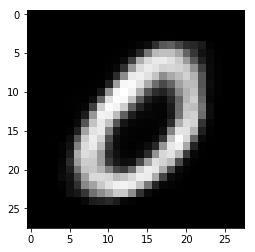

In [8]:
view_data = train_data.data[1].type(torch.FloatTensor) / 255.
_, decoded = autoencoder(view_data.view(-1, 28*28))
plt.imshow(decoded.data.numpy().reshape(28, 28), cmap="gray")
plt.show()

In [9]:
train_data.targets[1]

tensor(0)